## Construir un dataset haciendo web scraping de páginas web de su elección
- Definir 4 categorías de noticias/artículos.
- Para cada categoría, extraer los siguientes datos de 10 noticias diferentes:
  - url (sitio web donde se publicó el artículo)
  - título (título del artículo) 
  - texto (contenido del artículo)
##### Recomendaciones 
Elegir blogs para evitar los límites de lectura para los medios que exigen suscripción. Investigue sobre el archivo robots.txt y téngalo en cuenta. 
Considere también espaciar las consultas para evitar saturar el sitio.
Utilizando los datos obtenidos construya el dataset en formato csv.

Categorias elegidas
- Deporte
- Economía
- Salud
- Tecnología

Instalación e importación de librerías

In [2]:
!python -m pip install --upgrade pip
!pip install bs4 -q
!pip install transformers -q
!pip install nltk -q
!pip install torch -q
!pip install wordcloud -q
!pip install tensorflow -q
!pip install tensorflow-hub -q

from importe_de_librerias import libraries_import
libraries_import()

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patricio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patricio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ejercicio 1

In [ ]:
from Ejercicio1 import scrapping

scrapping() 
# FALTAN COSAS. 
# Esto no guarda nada en archivo.csv, pero me pierdo con tantos archivos. además hay que importar sus funciones tmb

Ejercicio 2

In [5]:
from Ejercicio2 import data_preprocessing_and_split, training, evaluation, classify_new_phrases
import pandas as pd

df = pd.read_csv("archivo.csv")
xtrain, xtest, ytrain, ytest = data_preprocessing_and_split(df)
modelo = training(xtrain, ytrain)
evaluation(modelo, xtest, ytest)
classify_new_phrases(modelo, new_phrases = [
        "gol de Boca",
        "nueva gpu",
        "dolar nuevo alto",
        "dólar", #sigue dando mal así
        "nueva ola de covid"
    ])

Precisión Regresión Logística: 0.875
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

    deportes       1.00      1.00      1.00         7
    economia       0.75      0.75      0.75         4
       salud       1.00      0.67      0.80         3
       tecno       0.82      0.90      0.86        10

    accuracy                           0.88        24
   macro avg       0.89      0.83      0.85        24
weighted avg       0.88      0.88      0.87        24

[[7 0 0 0]
 [0 3 0 1]
 [0 0 2 1]
 [0 1 0 9]] 

Texto: 'gol de Boca.Clasificación predicha: deportes
'
Texto: 'nueva gpu.Clasificación predicha: tecno
'
Texto: 'dolar nuevo alto.Clasificación predicha: tecno
'
Texto: 'dólar.Clasificación predicha: tecno
'
Texto: 'nueva ola de covid.Clasificación predicha: economia
'


Ejercicio 3

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patricio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patricio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Frecuencia de 5 palabras random de economia:
costo: 9
cobertura: 3
bajó: 2
10: 13
puntos: 8
año: 45


Frecuencia de 5 palabras random de deportes:
gimnasia: 9
1: 20
river: 26
plate: 11
2el: 1
año: 25


Frecuencia de 5 palabras random de salud:
consumo: 26
frutas: 13
ayuda: 3
disminuir: 6
riesgo: 40
año: 9


Frecuencia de 5 palabras random de tecno:
servicios: 29
whatsapp: 26
telegram: 2
hace: 20
años: 31
año: 32




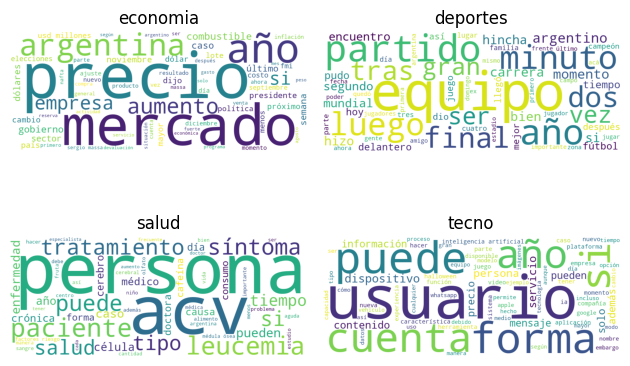

In [6]:
from Ejercicio3 import df2texts, texts_normalization, word_count, wordcloud

df = pd.read_csv('archivo.csv')
textos = df2texts(df)
textos = texts_normalization(textos)
word_count(textos)
wordcloud(textos)